In [74]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

In [22]:
# Adaline neuron                
                
class Neuron:
    
    def __init__(self, eta = 0.1, epochs = 10, is_verbose = False):
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []

        
    def predict(self,x):
        
        ones = np.ones((x.shape[0], 1))
        x_1 = np.append(x.copy(),ones,1)
        
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self,x):
        
        activation = np.dot(x,self.w)
        return activation

    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(),ones,1)
        
        self.w = np.random.rand(X_1.shape[1])
        #  print('Initial w:')
        #  print(w)

        # for i in range(len(X_1)):
        #     print(predict(X_1[i,],w))


        for epoch in range(self.epochs):
            
            error = 0
            
            # ***** optimised version *****
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation),X_1)
            self.w += delta_w
            #print(self.w)
            errors = np.square(y - activation).sum()/2.0
            
            self.list_of_errors.append(errors)

            if(self.is_verbose):
                print(f'Epoch: {epoch}, weigths: {self.w}, errors: {number_of_errors}')



[ 0.00183566  0.25533239 -0.04227979 -0.0858636 ]
[1]
[1]
[1]
Errors last: 6.113263201803679


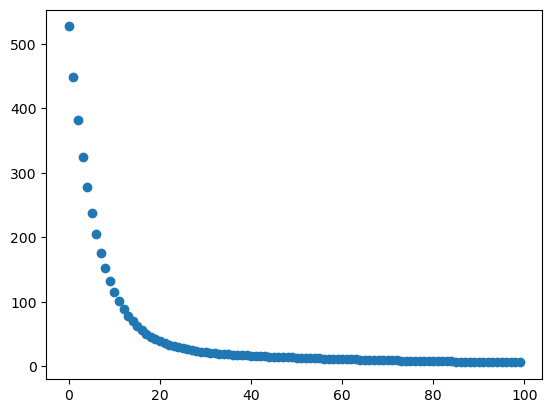

In [31]:
X = np.array([
    [2, 4,  20],  # 2*2 - 4*4 + 20 =   8 > 0
    [4, 3, -10],  # 2*4 - 4*3 - 10 = -14 < 0
    [5, 6,  13],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5, 4,   8],  # 2*5 - 4*4 + 8 =    2 > 0
    [3, 4,   5],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])

# not to large eta (not too fast because the error is increasing)
neuron = Neuron(eta = 0.0001, epochs = 100,is_verbose=False)
neuron.fit(X,y)

print(neuron.w)

print(neuron.predict(np.array([[2,4,20]])))    #1
print(neuron.predict(np.array([[20,100,-1]]))) #-1
print(neuron.predict(np.array([[3,3,3]])))     #1
    
plt.scatter(range(neuron.epochs),neuron.list_of_errors)
print(f'Errors last: {neuron.list_of_errors[-1]}')
#plt.yscale('log')

[(-1, 1), (-1, 1), (1, 1), (-1, 1), (-1, 1), (1, -1), (-1, 1), (-1, 1), (1, -1), (-1, -1), (1, -1), (-1, 1), (1, -1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (1, 1), (1, -1)]
17


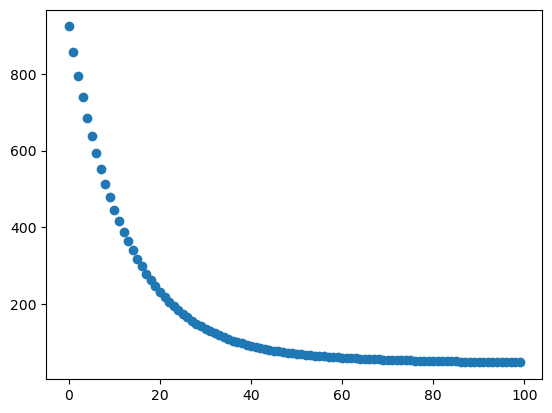

In [36]:
df = pd.read_csv('data/iris.data',header = None)
df = df.iloc[:100, :].copy()
df[4] = df[4].apply(lambda x: 1 if x == 'Iris-setosa' else -1)

X = df.iloc[:, :-1].values
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

neuron = Neuron(eta = 0.00001, epochs = 100)
neuron.fit(X_train,y_train)

y_pred = neuron.predict(X_test)

print(list(zip(y_test,y_pred)))

print(np.count_nonzero(y_test-y_pred))

plt.scatter(range(neuron.epochs),neuron.list_of_errors)

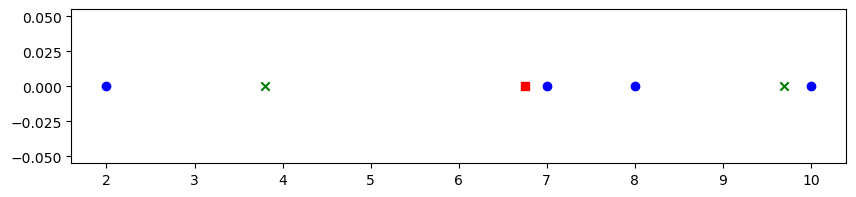

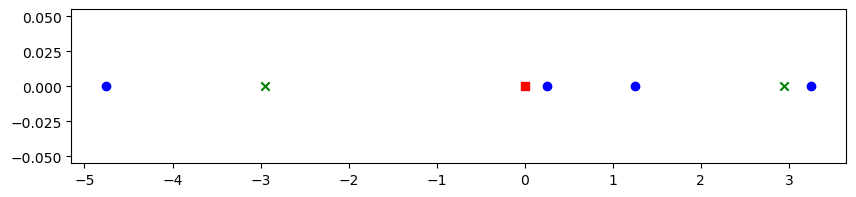

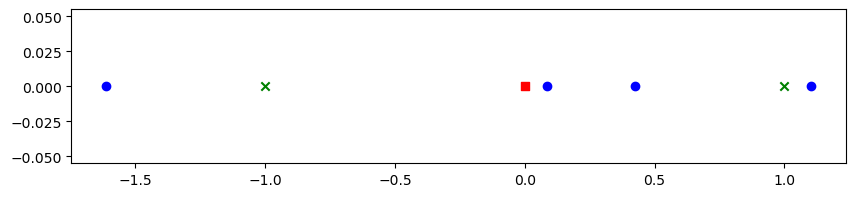

In [52]:
#standardization of data

data = np.array([2.,7.,8.,10.])
zeros = np.zeros(data.shape[0])


plt.figure(figsize=(10,2))
plt.scatter(data, zeros, color = 'b', marker = 'o')
plt.scatter(data.mean(), y=0, color = 'r', marker = 's')
plt.scatter([data.mean()-data.std(), data.mean()+data.std()], [0.0,0.0], color = 'g', marker = 'x')


mean = data.mean()
data_stand = data - mean

plt.figure(figsize=(10,2))
plt.scatter(data_stand, zeros, color = 'b', marker = 'o')
plt.scatter(data_stand.mean(), y=0, color = 'r', marker = 's')
plt.scatter([data_stand.mean()-data_stand.std(), data_stand.mean()+data_stand.std()], [0.0,0.0], color = 'g', marker = 'x')

std = data_stand.std()
data_stand2 = data_stand/std

plt.figure(figsize=(10,2))
plt.scatter(data_stand2, zeros, color = 'b', marker = 'o')
plt.scatter(data_stand2.mean(), y=0, color = 'r', marker = 's')
plt.scatter([data_stand2.mean()-data_stand2.std(), data_stand2.mean()+data_stand2.std()], [0.0,0.0], color = 'g', marker = 'x')


In [68]:
def DataStandarization(X):
    for col in range(X.shape[1]):
        X[:,col] = (X[:,col] - X[:,col].mean()) / X[:,col].std()
        
X = np.array([
    [2., 4.,  20.],  # 2*2 - 4*4 + 20 =   8 > 0
    [4., 3., -10.],  # 2*4 - 4*3 - 10 = -14 < 0
    [5., 6.,  13.],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5., 4.,   8.],  # 2*5 - 4*4 + 8 =    2 > 0
    [3., 4.,   5.],  # 2*3 - 4*4 + 5 =   -5 < 0 
])

# DataStandarization(X)

scaler = StandardScaler()
scaler.fit(X)
scaler.mean_
X = scaler.transform(X)

print(X)
        
    
    

[[-1.54348727 -0.20412415  1.28153877]
 [ 0.17149859 -1.22474487 -1.72206772]
 [ 1.02899151  1.83711731  0.58069726]
 [ 1.02899151 -0.20412415  0.08009617]
 [-0.68599434 -0.20412415 -0.22026448]]


0.8947368421052632


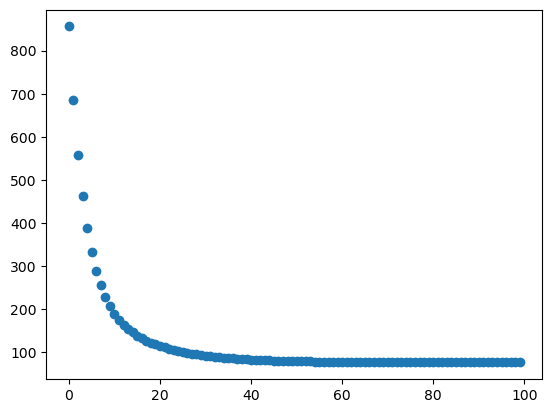

In [162]:
# Breast cancer data

diag = pd.read_csv('data/breast_cancer.csv')
diag.keys()
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]
y = diag[['diagnosis']]

y = diag['diagnosis'].apply(lambda x: 1 if x == 'M' else -1)
y = y.values

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size = 0.2)

neuron = Neuron(eta = 0.0001, epochs = 100)
neuron.fit(X_train,y_train)

y_pred = neuron.predict(X_test)

#print(list(zip(y_test,y_pred)))

good = len(y_test) - np.count_nonzero(y_test-y_pred)
errors = np.count_nonzero(y_test-y_pred)
total = len(y_test)

good_p = good/total
print(good_p)

plt.scatter(range(neuron.epochs),neuron.list_of_errors)
